In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [ ]:
train_data.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,NaN,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08 9:00,02/10/08,5555
1,NaN,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 10:00,02/10/08,4525
2,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772
3,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031
4,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928


In [3]:
train_data = train_data.sample(frac=0.2, random_state=42)

In [4]:
X = train_data.drop('Traffic_Vol', axis=1)
y = train_data['Traffic_Vol']

In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
submission = pd.DataFrame({'ID': range(len(X_test)), 'Traffic_Vol': y_pred})
# Use range(len(X_test)) to create a sequence of numbers as IDs
submission.to_csv('submission_gbr.csv', index=False)

print("Submission file 'submission_gbr.csv' created.")

Submission file 'submission_gbr.csv' created.


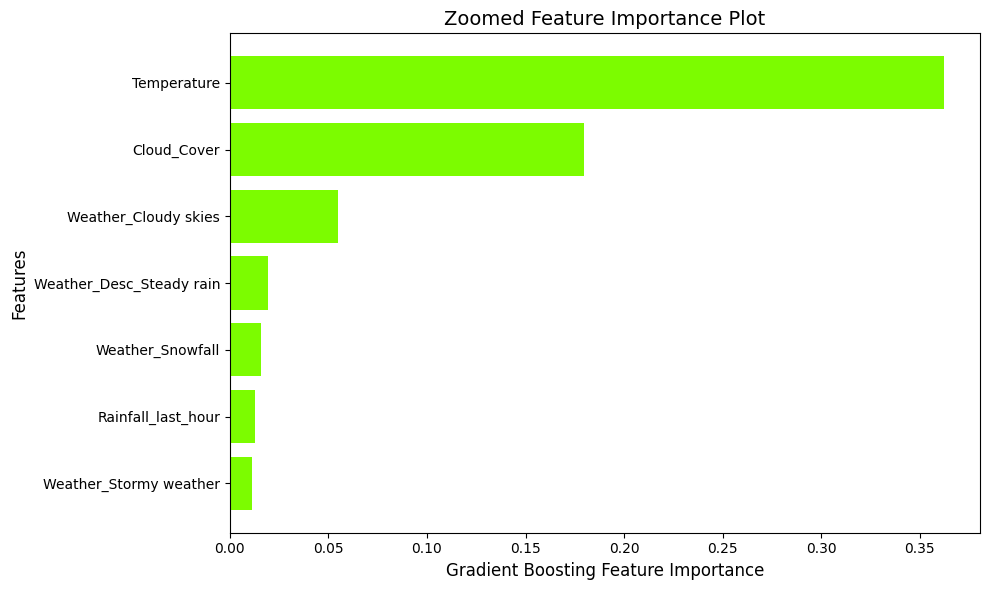

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter features with significant importance (e.g., > 0.01)
significant_idx = feature_importance > 0.01
significant_features = np.array(X.columns)[significant_idx]
significant_importance = feature_importance[significant_idx]

# Sort the significant features
sorted_idx = np.argsort(significant_importance)

# Plot the zoomed-in region
plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.barh(significant_features[sorted_idx], significant_importance[sorted_idx], color='lawngreen')
plt.xlabel("Gradient Boosting Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Zoomed Feature Importance Plot", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

df = train_data.copy()  # Create a copy to avoid modifying the original DataFrame

# Replace 'Date_Time' with the actual name of your datetime column in the DataFrame
datetime_column_name = 'Date'  # Assuming 'Date_Time' is your datetime column

# Extract hour, day of week, and weekend indicator
df['hour'] = pd.to_datetime(df[datetime_column_name]).dt.hour
df['day_of_week'] = pd.to_datetime(df[datetime_column_name]).dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# --- Ensure these column names are correct ---
temp_column_name = 'Temperature'  # Replace with your temperature column name
cloud_cover_column_name = 'Cloud_Cover'  # Replace with your cloud cover column name
traffic_volume_column_name = 'Traffic_Vol'  # Replace with your traffic volume column name
# --- ---

# Create interaction term (using corrected column names)
df['temp_cloud_interaction'] = df[temp_column_name] * df[cloud_cover_column_name]

# Apply polynomial features (using corrected column name)
poly = PolynomialFeatures(degree=2, include_bias=False)
temp_poly = poly.fit_transform(df[[temp_column_name]])
df[[temp_column_name, 'temp^2']] = temp_poly

# Normalize features (using corrected column names)
scaler = MinMaxScaler()
df[[temp_column_name, cloud_cover_column_name]] = scaler.fit_transform(df[[temp_column_name, cloud_cover_column_name]])

# Weather-based categories (using corrected column name)
df['temp_category'] = pd.cut(df[temp_column_name], bins=[-np.inf, 0.3, 0.7, np.inf], labels=['cold', 'moderate', 'hot'])

# Lag feature for traffic volume (using corrected column name)
df['traffic_volume_lag_1'] = df[traffic_volume_column_name].shift(1)
df['traffic_volume_rolling_avg'] = df[traffic_volume_column_name].rolling(window=3).mean()

# Drop rows with NaN (if generated due to lag/rolling)
df.dropna(inplace=True)

<ipython-input-19-1b7e46f4d8ae>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df[datetime_column_name]).dt.hour
<ipython-input-19-1b7e46f4d8ae>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['day_of_week'] = pd.to_datetime(df[datetime_column_name]).dt.dayofweek


In [ ]:
from sklearn.model_selection import train_test_split

# Split your data into features (X) and target (y)
X = df.drop('Traffic_Vol', axis=1)  # Replace 'target_column' with your actual target column name
y = df['Traffic_Vol']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your training data (replace 'Train.csv' with your actual file path)
train_data = pd.read_csv('Train.csv')

# --- Feature Engineering ---
df = train_data.copy()

# Extract datetime features
datetime_column_name = 'Date'  # Replace if your datetime column has a different name
df['hour'] = pd.to_datetime(df[datetime_column_name]).dt.hour
df['day_of_week'] = pd.to_datetime(df[datetime_column_name]).dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Define column names (replace if your column names are different)
temp_column_name = 'Temperature'
cloud_cover_column_name = 'Cloud_Cover'
traffic_volume_column_name = 'Traffic_Vol'

# Create interaction term
df['temp_cloud_interaction'] = df[temp_column_name] * df[cloud_cover_column_name]

# Apply polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
temp_poly = poly.fit_transform(df[[temp_column_name]])
df[[temp_column_name, 'temp^2']] = temp_poly

# Normalize features
scaler = MinMaxScaler()
df[[temp_column_name, cloud_cover_column_name]] = scaler.fit_transform(df[[temp_column_name, cloud_cover_column_name]])

# Weather-based categories
df['temp_category'] = pd.cut(df[temp_column_name], bins=[-np.inf, 0.3, 0.7, np.inf], labels=['cold', 'moderate', 'hot'])

# Lag feature for traffic volume
df['traffic_volume_lag_1'] = df[traffic_volume_column_name].shift(1)
df['traffic_volume_rolling_avg'] = df[traffic_volume_column_name].rolling(window=3).mean()

# Drop rows with NaN (introduced by lag/rolling features)
df.dropna(inplace=True)
# --- End of Feature Engineering ---

# ... (previous code) ...

# --- Data Splitting ---
# Split your data into features (X) and target (y) AFTER feature engineering
X = df.drop('Traffic_Vol', axis=1)
y = df['Traffic_Vol']

# Split into training and testing sets
# Added X, y, test_size, and random_state arguments
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ... (rest of your code) ...

<ipython-input-29-905c1970550c>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df[datetime_column_name]).dt.hour
<ipython-input-29-905c1970550c>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['day_of_week'] = pd.to_datetime(df[datetime_column_name]).dt.dayofweek


In [7]:
train_data['Hour'] = pd.to_datetime(train_data['TimeStamp']).dt.hour
train_data['DayOfWeek'] = pd.to_datetime(train_data['Date']).dt.dayofweek
train_data['Month'] = pd.to_datetime(train_data['Date']).dt.month

<ipython-input-7-8d1a10d1d70a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Hour'] = pd.to_datetime(train_data['TimeStamp']).dt.hour
<ipython-input-7-8d1a10d1d70a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['DayOfWeek'] = pd.to_datetime(train_data['Date']).dt.dayofweek
<ipython-input-7-8d1a10d1d70a>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Month'] = pd.to_datetime(train_data['Date']).dt.month


In [8]:
train_data['Weather'] = train_data['Weather'].astype('category').cat.codes
train_data['Weather_Desc'] = train_data['Weather_Desc'].astype('category').cat.codes

In [9]:
train_data['Lag1_Traffic'] = train_data['Traffic_Vol'].shift(1)
train_data['Lag2_Traffic'] = train_data['Traffic_Vol'].shift(2)
train_data.fillna(0, inplace=True)

In [10]:
train_data['Holiday'].fillna('None', inplace=True)
train_data['Is_Holiday'] = (train_data['Holiday'] != 'None').astype(int)

<ipython-input-10-fde6cb585567>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Holiday'].fillna('None', inplace=True)


In [11]:
train_data['Temp_Cloud'] = train_data['Temperature'] * train_data['Cloud_Cover']

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[['Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour']] = scaler.fit_transform(
    train_data[['Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour']]
)

In [13]:
# 7. Drop Unnecessary Columns
X = train_data.drop(['Traffic_Vol', 'TimeStamp', 'Date', 'Holiday'], axis=1)  # Drop columns not needed for modeling
y = train_data['Traffic_Vol']  # Target variable

# 8. Split Data into Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Train Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Train a Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

# Predict and Evaluate
y_pred = rfr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Random Forest Regressor R2 Score:", r2)

Random Forest Regressor R2 Score: 0.8411795907440964


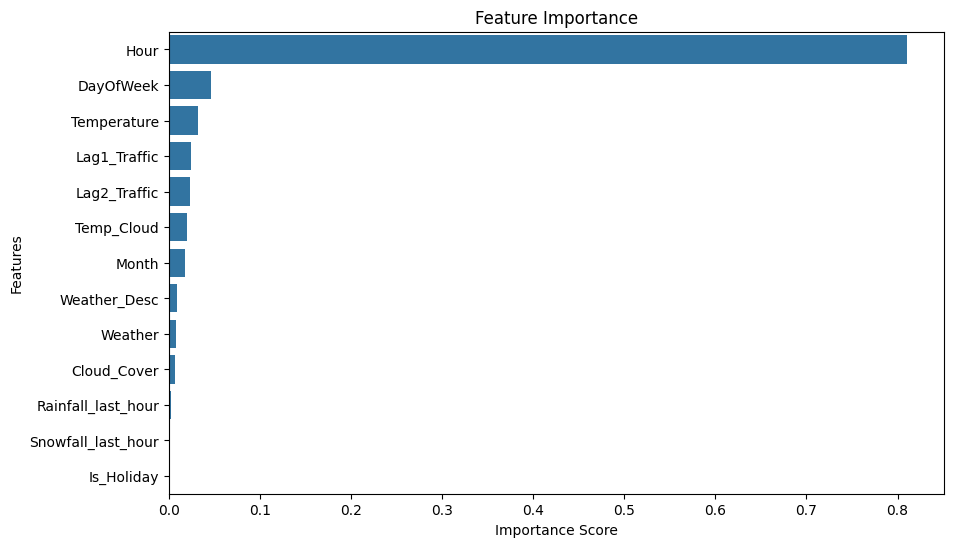

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [15]:
# Convert 'TimeStamp' to datetime
train_data['TimeStamp'] = pd.to_datetime(train_data['TimeStamp'], format='%d/%m/%y %H:%M', errors='coerce')

# Check for any null values in the TimeStamp column after conversion
print(train_data['TimeStamp'].isnull().sum())

# Drop rows with invalid datetime values if necessary
train_data = train_data.dropna(subset=['TimeStamp'])

# Extract Hour and Day of Week
train_data['Hour'] = train_data['TimeStamp'].dt.hour
train_data['DayOfWeek'] = train_data['TimeStamp'].dt.dayofweek

# Create Time of Day feature
def time_of_day(hour):
    if 5 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Afternoon'
    elif 17 <= hour <= 20:
        return 'Evening'
    else:
        return 'Night'

train_data['TimeOfDay'] = train_data['Hour'].apply(time_of_day)
train_data['IsWeekend'] = train_data['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Verify the new features
print(train_data[['Hour', 'DayOfWeek', 'TimeOfDay', 'IsWeekend']].head())

0
       Hour  DayOfWeek  TimeOfDay  IsWeekend
21055    16          2  Afternoon          0
13137    22          3      Night          0
14480     3          1      Night          0
12745    15          3  Afternoon          0
26175     6          1    Morning          0


In [16]:
# Drop unnecessary columns, like the original TimeStamp if not needed
X = train_data.drop(['Traffic_Vol', 'TimeStamp', 'Date'], axis=1)

# Convert categorical columns like 'Weather', 'Weather_Desc', and 'TimeOfDay' to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Target variable
y = train_data['Traffic_Vol']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# retraining rfr with feature engineering
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Train the Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

# Make predictions
y_pred = rfr.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"Updated Random Forest Regressor R2 Score: {r2:.4f}")

Updated Random Forest Regressor R2 Score: 0.9461


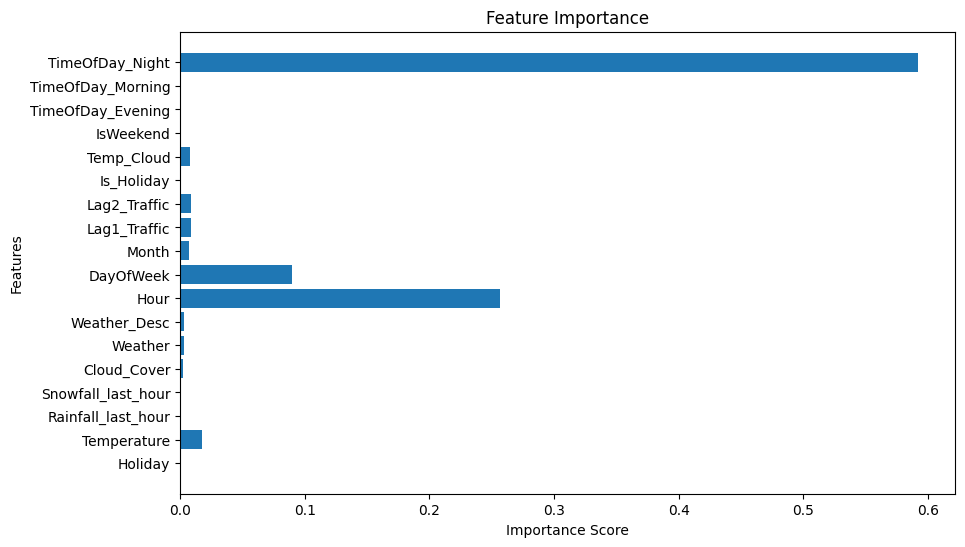

In [18]:
import matplotlib.pyplot as plt

# Feature importance
importance = rfr.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_rfr = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
# Prepare the test data in the same way
X_test_real = pd.get_dummies(test_data, drop_first=True).reindex(columns=X.columns, fill_value=0)

# Predictions
y_pred_real = best_rfr.predict(X_test_real)

# Save predictions
test_data['Predicted_Traffic_Vol'] = y_pred_real
test_data.to_csv('Predicted_Test.csv', index=False)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Assuming your feature set (X) and target variable (y) are already prepared
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=3)

# Train the model
gbr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Gradient Boosting Regressor R2 Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

Gradient Boosting Regressor R2 Score: 0.9416
Mean Squared Error: 228713.0918


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gbr_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean CV R2 Score: {cv_scores.mean():.4f}")

Cross-Validation R2 Scores: [0.93087651 0.93322166 0.93481303 0.93557611 0.93879234]
Mean CV R2 Score: 0.9347


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_:.4f}")

In [21]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize and train the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"XGBoost R2 Score: {r2_xgb:.4f}")
print(f"Mean Squared Error: {mse_xgb:.4f}")

XGBoost R2 Score: 0.9481
Mean Squared Error: 203279.8438


In [22]:
import joblib

# Save the model
joblib.dump(xgb_model, 'xgboost_model.pkl')
print("Model saved as xgboost_model.pkl")

Model saved as xgboost_model.pkl


In [23]:
pip install shap

# SHAP (SHapley Additive exPlanations) to interpret the predictions made by XGBoost.

 99%|===================| 6062/6140 [00:55<00:00]       

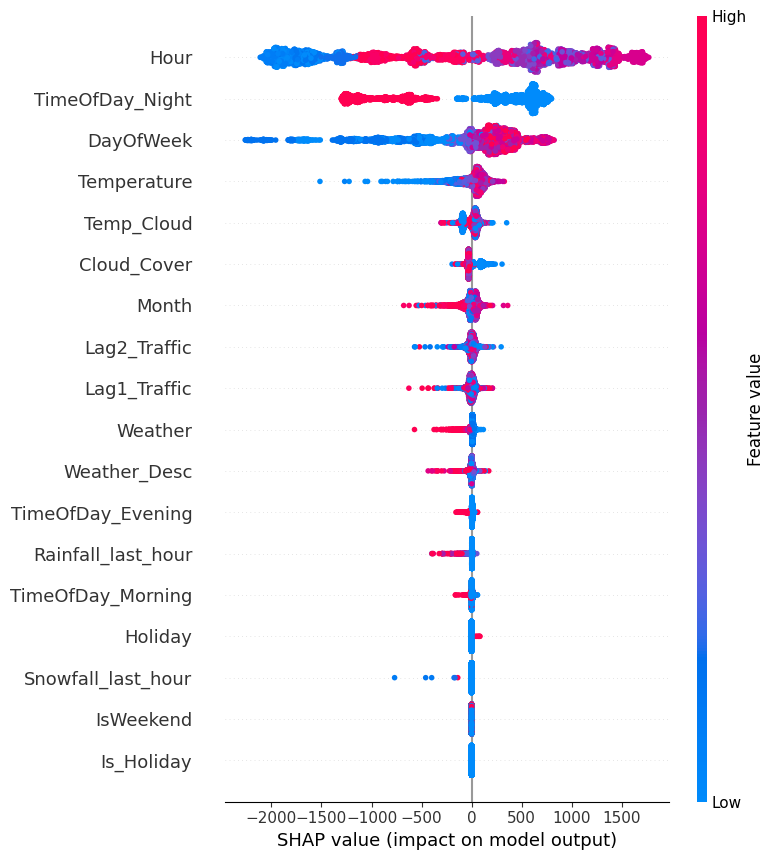

In [24]:
import shap
import pandas as pd
import numpy as np # Import numpy for numerical operations


# Convert categorical columns to numerical using one-hot encoding
# Selects categorical columns with object or category dtype
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

# Ensure all columns in X_train_encoded are numeric
# Replace infinite values with NaN
X_train_encoded = X_train_encoded.replace([np.inf, -np.inf], np.nan)

# Fill NaN values with a suitable strategy (e.g., mean, median)
# Choose a strategy appropriate for your data
for col in X_train_encoded.columns:
    if X_train_encoded[col].isnull().any():
        # Example: filling with the mean
        X_train_encoded[col] = X_train_encoded[col].fillna(X_train_encoded[col].mean())

# Convert all columns to numeric dtype explicitly if necessary
# This is a safety measure to ensure data consistency
X_train_encoded = X_train_encoded.astype(float)


# Explain the model predictions using SHAP
explainer = shap.Explainer(xgb_model, X_train_encoded)
shap_values = explainer(X_train_encoded)

# Summary plot
shap.summary_plot(shap_values, X_train_encoded)

- he SHAP summary plot visualizes the contribution of each feature to the predictions of your model, indicating how each feature impacts the model output.

- the Hour feature has the highest importance, followed by TimeOfDay_Night, DayOfWeek, and Temperature. These features contribute the most to the model's predictions.

- Red represents high feature values, and blue represents low feature values.

In [25]:
# Evaluate on the test set
y_pred_test = xgb_model.predict(X_test)
test_r2_score = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Test R2 Score: {test_r2_score:.4f}")
print(f"Test Mean Squared Error: {test_mse:.4f}")

Test R2 Score: 0.9481
Test Mean Squared Error: 203279.8438


In [26]:
print(test_data.columns)

Index(['Holiday', 'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour',
       'Cloud_Cover', 'Weather', 'Weather_Desc', 'TimeStamp', 'Date',
       'Traffic_Vol'],
      dtype='object')


In [30]:
# Convert categorical columns to numerical using one-hot encoding
# Make sure to include all categorical columns present in the training data
categorical_cols = ['Weather', 'Weather_Desc', 'Date', 'Holiday', 'TimeStamp'] # List all your categorical features

# Remove categorical columns not present in test_data
categorical_cols = [col for col in categorical_cols if col in test_data.columns]

# Apply one-hot encoding to test_data
test_data_encoded = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)



# Reindex columns to match the training data
# This ensures the model receives the expected features
# Fill missing columns with 0 (assuming they were absent during training)
test_data_encoded = test_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Ensure all columns are of numeric type
test_data_encoded = test_data_encoded.astype(float)


# Now you can use the encoded test data for prediction
predictions = xgb_model.predict(test_data_encoded)

submission = pd.DataFrame({
    'ID': range(1, len(test_data) + 1),  # Sequential ID starting from 1
    'Traffic_Vol': predictions  # Replace with your model's prediction array
})

# Save to CSV with proper formatting
submission.to_csv('submission.csv', index=False, encoding='utf-8')

print("Submission file successfully saved as 'submission.csv'")

Submission file successfully saved as 'submission.csv'


In [31]:
submission = pd.DataFrame({
    'ID': test_data['TimeStamp'],  # Use 'TimeStamp' if required
    'Traffic_Vol': predictions
})

In [35]:
X_final = X  # Replace with the correct variable for your training features

In [37]:
print(test_data.columns)

Index(['Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour',
       'Cloud_Cover', 'Traffic_Vol'],
      dtype='object')


In [40]:
import pandas as pd

# Ensure test_data has the same columns as the model training data
missing_cols = set(X_final.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0

# Remove any extra columns that might exist in test_data
extra_cols = set(test_data.columns) - set(X_final.columns)
test_data = test_data.drop(columns=list(extra_cols))

# Ensure test_data columns are in the same order as X_final.columns
test_data = test_data[X_final.columns]

# Make predictions using the trained model
# Replace 'xgb_model' with the actual name of your trained model
# (e.g., best_rfr, gbr_model, etc.)
predictions = xgb_model.predict(test_data)

# Prepare the submission file
submission = pd.DataFrame({
    'ID': test_data.index,  # Or replace with a unique ID column if required
    'Traffic_Vol': predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'.")

Submission file saved as 'submission.csv'.
